# LOAN APPROVAL PREDICTION USING MACHINE LEARNING

**Finance companies deals with some kinds of home loans. They may have their presence across urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.**

**Mostly Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, I have provided a data set to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. Try to automate this Loan Eligibility Process.**

# Dataset:

| **Variable**        | **Description**                          |
|----------------------|------------------------------------------|
| Loan ID             | Unique Loan ID                          |
| Gender              | Male/Female                             |
| Married             | Applicant married (Y/N)                 |
| Dependents          | Number of dependents                    |
| Education           | Applicant Education (Graduate/Under Graduate) |
| Self Employed       | Self employed (Y/N)                     |
| ApplicantIncome     | Applicant income                        |
| CoapplicantIncome   | Coapplicant income                      |
| Loan Amount         | Loan amount in thousands                |
| Loan_Amount_Term    | Term of loan in months                  |
| Credit History      | Credit history meets guidelines         |
| Property Area       | Urban / Semi Urban / Rural              |
| Loan Status         | Loan approved (Y/N)                     |


# Overview of Loan Approval Prediction Project:
**The Loan Approval Prediction Project aims to automate and enhance the decision-making process for loan approvals using machine learning. By analyzing key applicant attributes, the system predicts whether a loan application is likely to be approved or rejected. This project demonstrates the practical application of data preprocessing, feature engineering, and machine learning model development for solving real-world problems.**

In [115]:
import pandas as pd
df=pd.read_csv("loan.csv")

In [117]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Removing the Loan_ID column which is not necessary:**

In [120]:
df = df.drop(columns=['Loan_ID'])
print(df.head())

  Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3 

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [124]:
df.shape

(614, 12)

In [126]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [128]:
df.dropna(inplace=True) #dropping the null values

In [130]:
cat_col=["Gender","Married","Dependents","Education","Self_Employed","Loan_Amount_Term","Property_Area","Loan_Status"]

In [132]:
for x in cat_col:
    print(df[x].unique())

['Male' 'Female']
['Yes' 'No']
['1' '0' '2' '3+']
['Graduate' 'Not Graduate']
['No' 'Yes']
[360. 120. 180.  60. 300. 480. 240.  36.  84.]
['Rural' 'Urban' 'Semiurban']
['N' 'Y']


# Visualization of Categorical Features:

**This code creates count plots for each categorical feature in the dataset, grouped by Loan_Status. These plots help visualize how different categories of each feature relate to loan approval outcomes. The layout is organized into a grid for better readability, with clear spacing between the plots.**

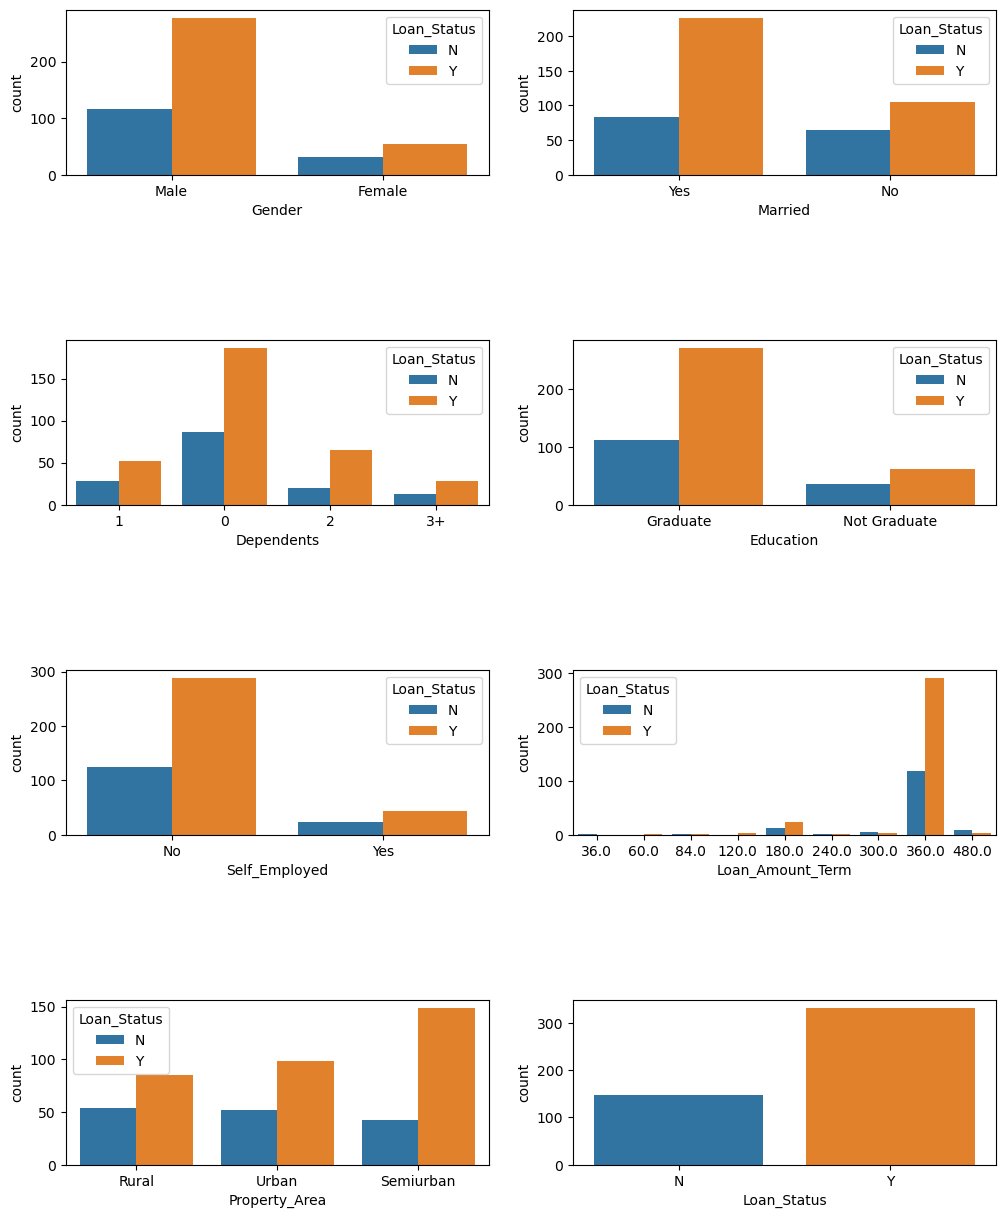

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,axes=plt.subplots(4,2,figsize=(12,15))
for idx,cat in enumerate(cat_col):
    row,col=idx//2,idx%2
    sns.countplot(x=cat,data=df,hue='Loan_Status',ax=axes[row,col])
plt.subplots_adjust(hspace=1)

# Data Preprocessing:

### Encoding Categorical Variables with LabelEncoder

The code snippet applies **Label Encoding** to the categorical columns in the dataset, transforming text labels into numerical values. The `LabelEncoder` class from `sklearn.preprocessing` is used to achieve this. 

- A dictionary named `label_encoders` is created to store individual encoders for each categorical column in `cat_col`.
- For each column in `cat_col`, a `LabelEncoder` object is instantiated and applied to the column.
- The `.fit_transform()` method converts the string labels into unique integers, allowing the machine learning model to process categorical data effectively.

This encoding is necessary as many machine learning algorithms can only work with numerical inputs, not strings or categories.


In [221]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()

In [223]:
label_encoders={}
for column in cat_col:
    label_encoders[column]=LabelEncoder()
    df[column]=label_encoders[column].fit_transform(df[column])

# Model selection and model building

### Training and Evaluating a Decision Tree Classifier

This code implements a **Decision Tree Classifier** to predict loan approval and evaluates its performance.

1. **Splitting the Dataset**:
   - The dataset is divided into features (`x`) and the target variable (`y`) using `.iloc[]`.
   - The `train_test_split` function splits the data into training (80%) and testing (20%) sets for model evaluation.

2. **Training the Model**:
   - A `DecisionTreeClassifier` instance is created and trained using the `fit()` method on the training data (`X_train`, `y_train`).

3. **Evaluating Performance**:
   - Predictions are generated on the training data using `predict()`.
   - The model's accuracy and F1 score are computed using `accuracy_score` and `f1_score`.
   - **Cross-validation** is performed to calculate the mean F1 score and accuracy over 5 folds using `cross_val_score`.

4. **Output**:
   - The training accuracy and F1 score assess how well the model fits the training data.
   - Cross-validation metrics evaluate the model's generalization ability across different data subsets.

This workflow ensures robust training and testing of the Decision Tree Classifier, highlighting its predictive power and reliability.


In [ ]:
x=df.iloc[:,df.columns!='Loan_Status']
y=df.iloc[:,df.columns=='Loan_Status']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score

tree_clf=DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred=tree_clf.predict(X_train)
print("Training Data Set Accuracy:",accuracy_score(y_train,y_pred))
print("Training Data F1 score",f1_score(y_train,y_pred))
print("Validation Mean F1 Score:",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy:",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy: 1.0
Training Data F1 score 1.0
Validation Mean F1 Score: 0.6855161435070323
Validation Mean Accuracy: 0.7214627477785374


**The output shows that the training data accuracy and F1 score are perfect (1.0), indicating the model has likely overfitted the training data. However, the validation metrics (F1 score: 0.68, Accuracy: 0.72) are significantly lower, highlighting poor generalization to unseen data. This discrepancy suggests the need for fine-tuning to reduce overfitting and improve validation performance, ensuring the model performs better on new, unseen data. Fine-tuning techniques like hyperparameter optimization and feature selection can help achieve a better balance between training and validation metrics.**

# Hyperparameter Tuning: Decision Tree max_depth Analysis

This code implements hyperparameter tuning by analyzing the effect of max_depth on the performance of a Decision Tree Classifier.

Purpose: It evaluates the training and validation metrics (Accuracy and F1 Score) across various max_depth values (1 to 19) to identify the optimal depth that balances underfitting and overfitting.
Steps:
For each depth, the model is trained, and predictions are made on the training data.
Metrics such as training accuracy, validation accuracy, training F1 score, and validation F1 score are calculated using cross-validation.
The results are stored in lists for visualization.
Visualization: A point plot is generated to display how metrics vary with max_depth. It helps in selecting the depth that provides high validation scores while avoiding overfitting.
Outcome: This approach ensures a well-tuned model by leveraging the right complexity level for the Decision Tree.

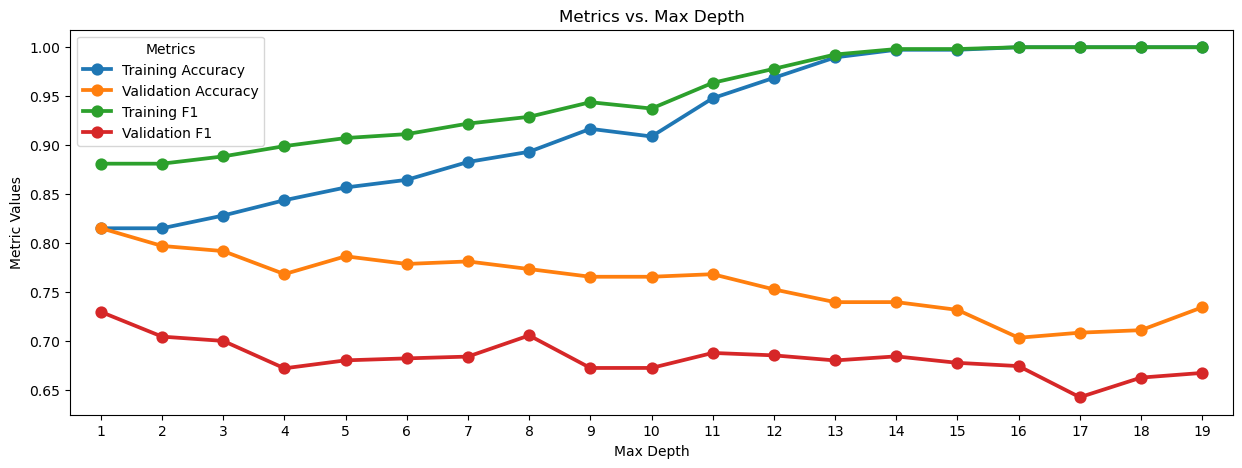

In [233]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1, 20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train, y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train, y_training_pred)
    train_f1 = f1_score(y_train, y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf, X_train, y_train, cv=5, scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf, X_train, y_train, cv=5, scoring='accuracy').mean()

    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)
Tuning_Max_depth = {
    "Max_Depth": tree_depths,  
    "Training Accuracy": training_accuracy,
    "Validation Accuracy": val_accuracy,
    "Training F1": training_f1,
    "Validation F1": val_f1,
}
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)
plot_df = Tuning_Max_depth_df.melt('Max_Depth', var_name='Metrics', value_name="Values")

fig, ax = plt.subplots(figsize=(15, 5))
sns.pointplot(x="Max_Depth", y="Values", hue="Metrics", data=plot_df, ax=ax)
plt.title("Metrics vs. Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Metric Values")
plt.show()


In [237]:
tree_clf= DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train,y_train)
model=tree_clf
y_pred=tree_clf.predict(X_train)
print("Training Data Set Accuracy: ",accuracy_score(y_train,y_pred))
print("Training Data F1 Score: ",f1_score(y_train,y_pred))
print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  0.828125
Training Data F1 Score:  0.8885135135135135
Validation Mean F1 Score:  0.7000642628681333
Validation Mean Accuracy:  0.7917976760082024


In [70]:
import pickle

In [72]:
with open('LoanFinal.pickle','wb') as f:
    pickle.dump(model,f)
    f.close()

In [74]:
model=pickle.load(open('LoanFinal.pickle','rb'))

In [76]:
y_train.head(10)

,Loan_Status
74,1
453,1
169,1
155,1
242,1
110,1
276,1
547,1
50,1
575,1


In [78]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

import numpy as np
#answer=np.array((1.668e+03, 3.890e+03, 2.010e+02, 3.600e+02, 0.000e+00, 1.000e+00,)).reshape(1,-1)
#answer=[[1,1,2,0,0,8333,3167.0,165.0,7,1.0,0]] #1
#answer=[[1,1,0,1,0,7660,0.0,104.0,7,0.0,2]] #0
answer = [[0, 0, 0, 0, 0, 8333, 3167.0, 165.0, 0, 1.0, 0]]

In [80]:
print("Predicts:"+str(model.predict(answer)))

Predicts:[1]


In [82]:
column_names=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']


# Final Thoughts:
**This project demonstrated the potential of machine learning in automating loan approval predictions. However, for real-world deployment, additional steps like handling class imbalance, incorporating more advanced models, and ensuring proper feature selection would be necessary to achieve robust and reliable predictions.**